In [1]:
import numpy as np
import nibabel as nib
import glob
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import random
import keras

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data importing from the drive address.
#dataset path address=>> /content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_131

data_path= "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_131"

test_image_T1= nib.load(data_path + "/BraTS20_Training_131_t1.nii").get_fdata()
print(test_image_T1.max())
test_image_T1= scaler.fit_transform(test_image_T1.reshape(-1, test_image_T1.shape[-1])).reshape(test_image_T1.shape)

test_image_T1ce= nib.load(data_path + "/BraTS20_Training_131_t1ce.nii").get_fdata()
print(test_image_T1ce.max())
test_image_T1ce= scaler.fit_transform(test_image_T1ce.reshape(-1, test_image_T1ce.shape[-1])).reshape(test_image_T1ce.shape)

test_image_T2= nib.load(data_path + "/BraTS20_Training_131_t2.nii").get_fdata()
print(test_image_T2.max())
test_image_T2= scaler.fit_transform(test_image_T2.reshape(-1, test_image_T2.shape[-1])).reshape(test_image_T2.shape)

test_image_flair= nib.load(data_path + "/BraTS20_Training_131_flair.nii").get_fdata()
print(test_image_flair.max())
test_image_flair= scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

test_mask= nib.load(data_path + "/BraTS20_Training_131_seg.nii").get_fdata()
test_mask= test_mask.astype(np.uint8)
print(np.unique(test_mask))

test_mask[test_mask == 4]= 3
print(np.unique(test_mask))

1136.0
1854.0
1258.0
1000.0
[0 1 2 4]
[0 1 2 3]


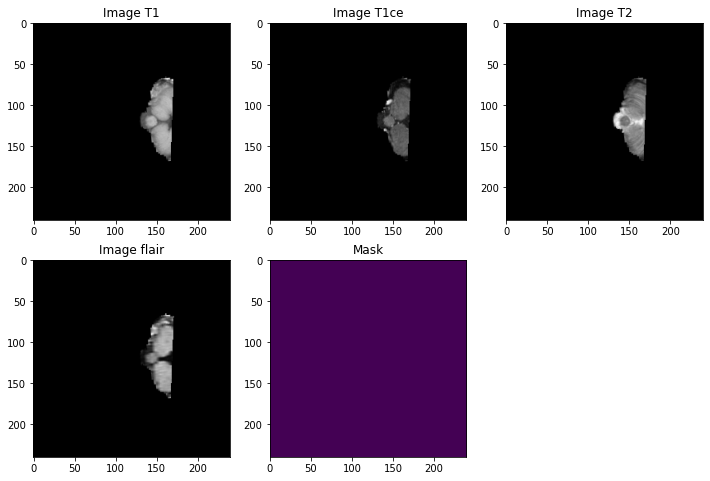

In [4]:
#plotting and showing the image.

n_slice= random.randint(0, test_mask.shape[2])
plt.figure(figsize= (12, 8))

plt.subplot(231)
plt.imshow(test_image_T1[:,:,n_slice], cmap='gray')
plt.title('Image T1')

plt.subplot(232)
plt.imshow(test_image_T1ce[:,:,n_slice], cmap='gray')
plt.title('Image T1ce')

plt.subplot(233)
plt.imshow(test_image_T2[:,:,n_slice], cmap='gray')
plt.title('Image T2')

plt.subplot(234)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')

plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')

plt.show()

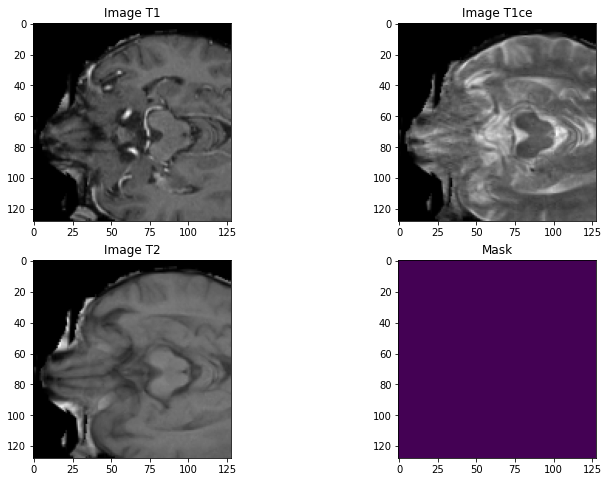

In [5]:
#cropping the images to make it 128, 128, 128

combined_x= np.stack([test_image_T1, test_image_T1ce, test_image_T2], axis= 3)

combined_x= combined_x[46:174, 46:174, 3:131]
test_mask= test_mask[46:174, 46:174, 3:131]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize= (12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image T1')

plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image T1ce')

plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image T2')

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [6]:
#saving the image in tif and numpy
imsave('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/combined131.tif', combined_x)
np.save('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/combined131.npy', combined_x)

In [7]:
#load the saved images
my_img=np.load('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/combined131.npy')

test_mask = to_categorical(test_mask, num_classes= 4)

In [8]:
#making list by collecting same type images and bringing them together
T1_list = sorted(glob.glob('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
T2_list = sorted(glob.glob('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
T1ce_list = sorted(glob.glob('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [9]:
#running a loop through the lists considering all the list has same length as T1
#then sorting them out if the file is to be saved or discarded
for img in range(len(T1_list)):  
    print("Now preparing image and masks number: ", img)

    temp_image_T1=nib.load(T1_list[img]).get_fdata()
    temp_image_T1=scaler.fit_transform(temp_image_T1.reshape(-1, temp_image_T1.shape[-1])).reshape(temp_image_T1.shape)
      
    temp_image_T2=nib.load(T2_list[img]).get_fdata()
    temp_image_T2=scaler.fit_transform(temp_image_T2.reshape(-1, temp_image_T2.shape[-1])).reshape(temp_image_T2.shape)
   
    temp_image_T1ce=nib.load(T1ce_list[img]).get_fdata()
    temp_image_T1ce=scaler.fit_transform(temp_image_T1ce.reshape(-1, temp_image_T1ce.shape[-1])).reshape(temp_image_T1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  
    
    temp_combined_images = np.stack([temp_image_T1, temp_image_T1ce, temp_image_T2], axis=3)
    
    temp_combined_images=temp_combined_images[46:174, 46:174, 3:131]
    temp_mask = temp_mask[46:174, 46:174, 3:131]

    val, counts = np.unique(temp_mask, return_counts=True)
    
    if((1 - (counts[0]/counts.sum())) > 0.01):  
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")  

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
I am useless
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
I am useless


In [11]:
pip install split-folders

In [10]:
import splitfolders

In [11]:
#splitting the folders to make input and output files seperated
 
input_folder = '/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData//input_data_3channels/'
output_folder = '/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData//input_data_128/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) 

Copying files: 38 files [00:34,  1.10 files/s]


In [12]:
#loading the npy images we made
import os
import numpy as np

def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [13]:
#loading the images and forming batch sizes
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)


    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y)     

            batch_start += batch_size   
            batch_end += batch_size

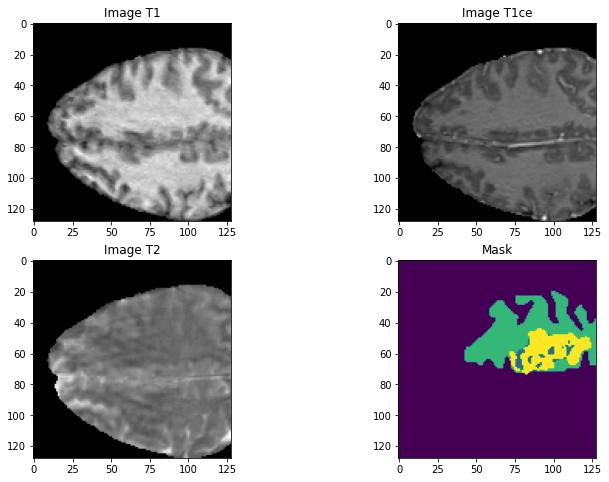

In [14]:
#train the images and masks and plot
train_img_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)


img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image T1')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image T1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image T2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')

plt.show()

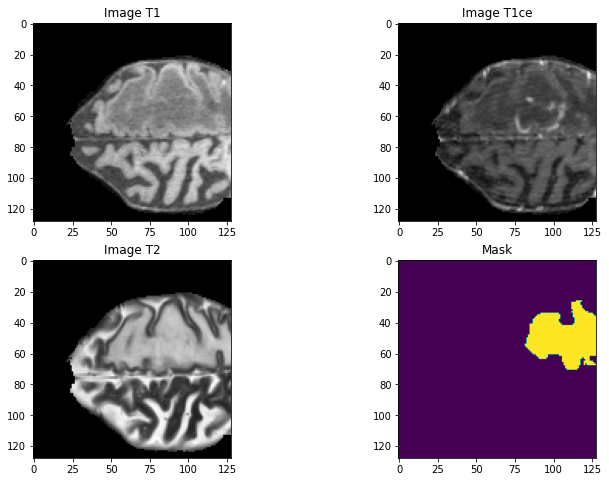

In [15]:
#training the image and mask directories and plot random ones from the directory
train_img_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image T1')

plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image T1ce')

plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image T2')

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')

plt.show()

In [16]:
#Define the image generators for training and validation
train_img_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/masks/"

val_img_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
train_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/train/masks/"

val_img_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "/content/drive/My Drive/Datasets/Datasets/BraTS2020_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

<Figure size 864x576 with 0 Axes>

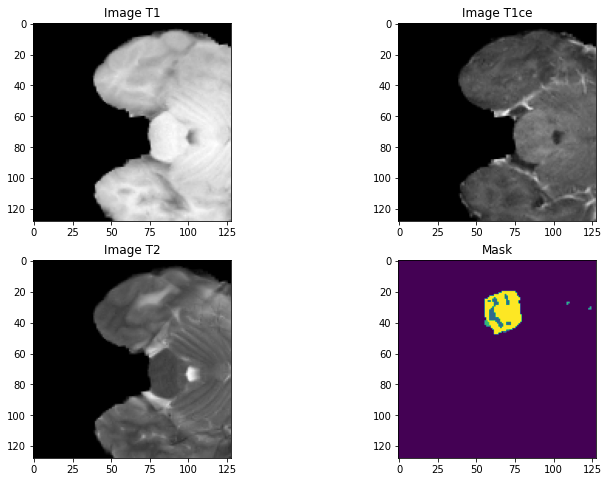

In [17]:
#run the imageLoader for the directories and random files from directories 
batch_size = 2
train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size)

img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image T1')

plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image T1ce')

plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image T2')

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [18]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [19]:
pip install keras-rectified-adam

In [20]:
import keras
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.metrics import MeanIoU

In [21]:
#The 3D TC model
kernel_initializer =  'random_normal' 
def The_3D_TC_Downsampling(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs
    #downsampling...Contraction
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    p5 = MaxPooling3D(pool_size=(2, 2, 2))(c5)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c5)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

In [22]:
#The 3D Unet model
kernel_initializer =  'random_normal' 
def The_3D_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    p5 = inputs
    #downsampling...Contraction
    c6 = Conv3D(512, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p5)
    c6 = Dropout(0.3)(c6)
    c6 = Conv3D(512, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
    p6 = MaxPooling3D((2, 2, 2))(c6)
    
    c7 = Conv3D(1024, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p6)
    c7 = Dropout(0.4)(c7)
    c7 = Conv3D(1024, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
    p7 = MaxPooling3D((2, 2, 2))(c7)
     
    c8 = Conv3D(2048, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p7)
    c8 = Dropout(0.4)(c8)
    c8 = Conv3D(2048, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
    p8 = MaxPooling3D((2, 2, 2))(c8)
     
    c9 = Conv3D(4096, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p8)
    c9 = Dropout(0.5)(c9)
    c9 = Conv3D(4096, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
    p9 = MaxPooling3D(pool_size=(2, 2, 2))(c9)
     
    c10 = Conv3D(8192, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p9)
    c10 = Dropout(0.5)(c10)
    c10 = Conv3D(9192, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c10)
    
    #upsampling...expansion
    u11 = Conv3DTranspose(4096, (2, 2, 2), strides=(2, 2, 2), padding='same')(c10)
    u11 = concatenate([u11, c9])
    c11 = Conv3D(4096, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u11)
    c11 = Dropout(0.6)(c11)
    c11 = Conv3D(4096, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c11)
     
    u12 = Conv3DTranspose(2048, (2, 2, 2), strides=(2, 2, 2), padding='same')(c11)
    u12 = concatenate([u12, c8])
    c12 = Conv3D(2048, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u12)
    c12 = Dropout(0.5)(c12)
    c12 = Conv3D(2048, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c12)
     
    u13 = Conv3DTranspose(1024, (2, 2, 2), strides=(2, 2, 2), padding='same')(c12)
    u13 = concatenate([u13, c7])
    c13 = Conv3D(1024, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u13)
    c13 = Dropout(0.4)(c13)
    c13 = Conv3D(1024, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c13)
     
    u14 = Conv3DTranspose(512, (2, 2, 2), strides=(2, 2, 2), padding='same')(c13)
    u14 = concatenate([u14, c6])
    c14 = Conv3D(512, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u14)
    c14 = Dropout(0.4)(c14)
    c14 = Conv3D(512, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c14)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c14)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

In [23]:
#The Dense Upsampling model
kernel_initializer =  'random_normal' 
def dense_upsampling_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    c13 = inputs
    #Dense downsampling operation 
    u15 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c13)
    u15 = concatenate([u15, c5])
    c15 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u15)
    c15 = Dropout(0.3)(c15)
    c15 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c15)
     
    u16 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c14)
    u16 = concatenate([u16, c8])
    c16 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u12)
    c16 = Dropout(0.2)(c16)
    c16 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c16)
     
    u17 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c15)
    u17 = concatenate([u17, c7])
    c17 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u17)
    c17 = Dropout(0.2)(c17)
    c17 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c17)
     
    u18 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c16)
    u18 = concatenate([u18, c6])
    c18 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u18)
    c18 = Dropout(0.1)(c18)
    c18 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c18)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c18)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

In [ ]:
#running the 3D Unet model
model_1 = The_3D_TC_Downsampling(128, 128, 128, 3, 4)
model_2 = The_3D_unet_model(128, 128, 128, 3, 4)
model_3 = dense_upsampling_model(128, 128, 128, 3, 4)
print(model_1.input_shape)
print(model_1.output_shape)
print(model_2.input_shape)
print(model_2.output_shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 128, 3  0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 128, 128, 128, 16  1312      
                             )                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 128, 16  0         
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 128, 128, 128, 16  6928      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 64, 64, 64, 16)   0     